# Week-3 EDA – Insurance Dataset
**Objective:** Perform exploratory data analysis on the MachineLearningRating dataset.
- Detect key numeric/categorical columns.
- Compute loss ratio.
- Visualize distributions, group-level summaries, temporal trends, and correlations.
- Save figures and summary CSV for reporting.


In [38]:
# ==========================
# EDA Setup – Week 3 KAIM
# ==========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

# Warnings and style
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

# Plot defaults
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Directory for figures
FIG_DIR = Path("reports/figures")
FIG_DIR.mkdir(parents=True, exist_ok=True)
print("Figures will be saved to:", FIG_DIR.resolve())

print("EDA environment ready! ✅")


Figures will be saved to: C:\Users\JERUSALEM\Desktop\10 ACA\Insurance Risk Analytics\Insurance-analytics-week-3\reports\figures
EDA environment ready! ✅


In [ ]:
# ==========================
# Optional: Convert TXT to CSV (run only if TXT changed)
# ==========================


import pandas as pd
from pathlib import Path

txt_path = Path("data/raw/MachineLearningRating_v3.txt")
csv_path = Path("data/raw/MachineLearningRating_v3.csv")  # output CSV

# Try common delimiters
delimiters = [",", "\t", "|", ";"]
for delim in delimiters:
    try:
        df = pd.read_csv(txt_path, sep=delim, nrows=5)  # check first 5 rows
        if df.shape[1] > 1:
            # Load full dataset with correct engine (C engine by default)
            df = pd.read_csv(txt_path, sep=delim, low_memory=False)
            print(f"Loaded TXT with delimiter: '{delim}'")
            break
    except Exception:
        continue
else:
    # fallback: default delimiter
    df = pd.read_csv(txt_path, low_memory=False)
    print("Loaded TXT with default delimiter ','")

# Save as CSV
df.to_csv(csv_path, index=False)
print(f"TXT file converted and saved as CSV: {csv_path}")


Loaded TXT with delimiter: '|'
TXT file converted and saved as CSV: data\raw\MachineLearningRating_v3.csv


### Cell 2 – Load CSV Dataset
This cell loads the cleaned CSV file into a DataFrame for analysis.


In [58]:
# Path to Week-3 CSV dataset
DATA_PATH = Path("data/raw/MachineLearningRating_v3.csv")

# Check if file exists
if not DATA_PATH.exists():
    raise FileNotFoundError(f"{DATA_PATH} not found! Please ensure the CSV exists.")

# Load CSV
df = pd.read_csv(DATA_PATH, low_memory=False)
print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")
df.head()


Dataset loaded: 1000098 rows, 52 columns


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


Cell – Column Standardization & Type Conversion

In [ ]:
# Standardize column names: lowercase, strip spaces, replace spaces with underscores
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]


# Function to detect key columns
def find_col(candidates):
    for c in candidates:
        if c in df.columns:
            return c
    return None

# Detect key columns
col_total_premium = find_col(["totalpremium","total_premium","premium"])
col_total_claims  = find_col(["totalclaims","total_claims","claims"])
col_province      = find_col(["province","region","state"])
col_vehicle       = find_col(["vehicletype","vehicle_type","make","model"])
col_gender        = find_col(["gender","sex"])
col_transaction   = find_col(["transactionmonth","transaction_date","date"])

# Print detected columns
print("Detected columns:")
print(f"Premium: {col_total_premium}, Claims: {col_total_claims}, Province: {col_province}")
print(f"Vehicle: {col_vehicle}, Gender: {col_gender}, Transaction: {col_transaction}")


Detected columns:
Premium: totalpremium, Claims: totalclaims, Province: province
Vehicle: vehicletype, Gender: gender, Transaction: transactionmonth


In [ ]:
# Convert types
df[col_total_premium] = pd.to_numeric(df[col_total_premium], errors='coerce')
df[col_total_claims]  = pd.to_numeric(df[col_total_claims], errors='coerce')
df[col_transaction]   = pd.to_datetime(df[col_transaction], errors='coerce')

# Quick check
df.dtypes[[col_total_premium, col_total_claims, col_transaction]]


totalpremium               float64
totalclaims                float64
transactionmonth    datetime64[ns]
dtype: object

In [67]:
# ==========================
# Cell – Confirm Key Columns
# ==========================

# Based on your DataFrame columns
col_total_premium = "totalpremium"
col_total_claims  = "totalclaims"
col_transaction   = "transactionmonth"

print("Columns used:")
print("Total Premium:", col_total_premium)
print("Total Claims:", col_total_claims)
print("Transaction Month:", col_transaction)


Columns used:
Total Premium: totalpremium
Total Claims: totalclaims
Transaction Month: transactionmonth


In [82]:
# Print all columns with their exact string representation
for c in df.columns:
    print(repr(c))


'underwrittencoverid'
'policyid'
'transactionmonth'
'isvatregistered'
'citizenship'
'legaltype'
'title'
'language'
'bank'
'accounttype'
'maritalstatus'
'gender'
'country'
'province'
'postalcode'
'maincrestazone'
'subcrestazone'
'itemtype'
'mmcode'
'vehicletype'
'registrationyear'
'make'
'model'
'cylinders'
'cubiccapacity'
'kilowatts'
'bodytype'
'numberofdoors'
'vehicleintrodate'
'customvalueestimate'
'alarmimmobiliser'
'trackingdevice'
'capitaloutstanding'
'newvehicle'
'writtenoff'
'rebuilt'
'converted'
'crossborder'
'numberofvehiclesinfleet'
'suminsured'
'termfrequency'
'calculatedpremiumperterm'
'excessselected'
'covercategory'
'covertype'
'covergroup'
'section'
'product'
'statutoryclass'
'statutoryrisktype'
'totalpremium'
'totalclaims'
'loss_ratio'
'month'


# ==========================
## Cell – Data Quality Summary
Check column data types, missing values, and percentage of missing data
# ==========================


In [ ]:
# ==========================
# Cell 5 – Data Quality Summary
# ==========================

# Create Data Quality summary
dq = pd.DataFrame({
    "column": df.columns,
    "dtype": df.dtypes.astype(str),
    "n_missing": df.isna().sum(),
    "pct_missing": (df.isna().mean() * 100).round(2)
}).sort_values("pct_missing", ascending=False)

# Display top 20 columns with the most missing data
dq.head(20)


,column,dtype,n_missing,pct_missing
NumberOfVehiclesInFleet,NumberOfVehiclesInFleet,float64,1000098,100.00
CrossBorder,CrossBorder,object,999400,99.93
CustomValueEstimate,CustomValueEstimate,float64,779642,77.96
Rebuilt,Rebuilt,object,641901,64.18
Converted,Converted,object,641901,64.18
WrittenOff,WrittenOff,object,641901,64.18
NewVehicle,NewVehicle,object,153295,15.33
Bank,Bank,object,145961,14.59
AccountType,AccountType,object,40232,4.02
Gender,Gender,object,9536,0.95


## Cell – Compute Loss Ratio & & Check Premiums
This cell calculates the loss ratio for each record as TotalClaims / TotalPremium.
It also prints the overall mean and median loss ratio for the portfolio.


In [81]:
# ==========================
# Cell – Compute Loss Ratio & Check Premiums
# ==========================

# Create loss_ratio column
df['loss_ratio'] = df[col_total_claims] / df[col_total_premium]
df['loss_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Summary statistics
print("Overall loss ratio (mean):", round(df['loss_ratio'].mean(skipna=True), 4))
print("Overall loss ratio (median):", round(df['loss_ratio'].median(skipna=True), 4))

# Check missing or zero premiums
missing_premium = df[col_total_premium].isna().sum()
zero_premium = (df[col_total_premium] == 0).sum()
print(f"Records with missing premium: {missing_premium}")
print(f"Records with zero premium: {zero_premium}")


Overall loss ratio (mean): 0.3499
Overall loss ratio (median): 0.0
Records with missing premium: 0
Records with zero premium: 381634


# Cell 7 – Univariate Analysis (Histograms & Boxplots)
This cell generates histograms and boxplots for the key numeric columns:
- Total Premium
- Total Claims
- Loss Ratio

All figures are displayed inline and saved to `reports/figures`.


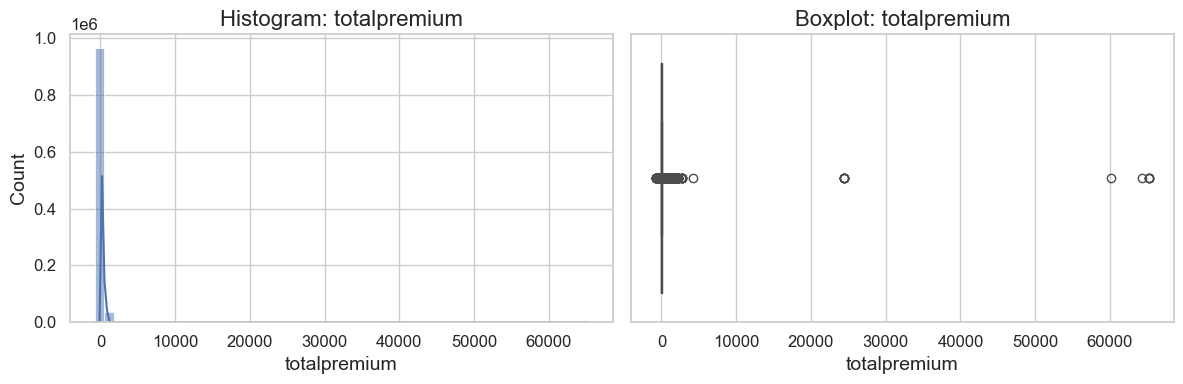

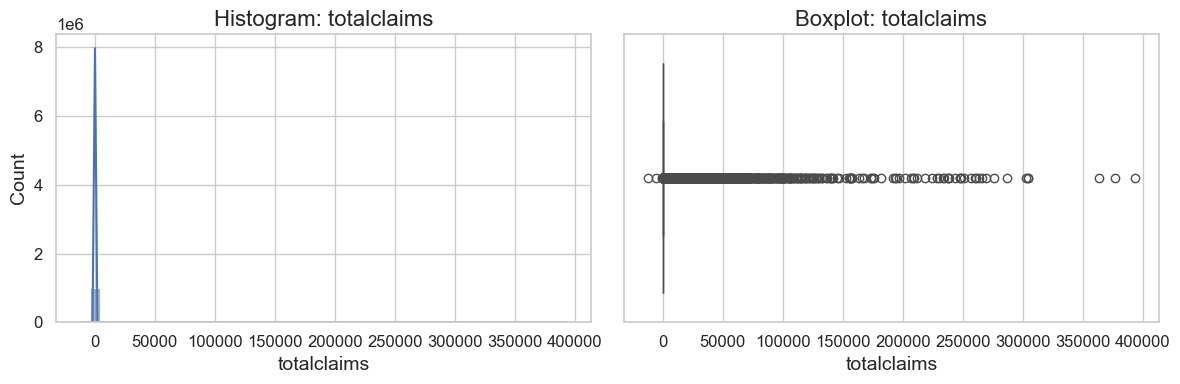

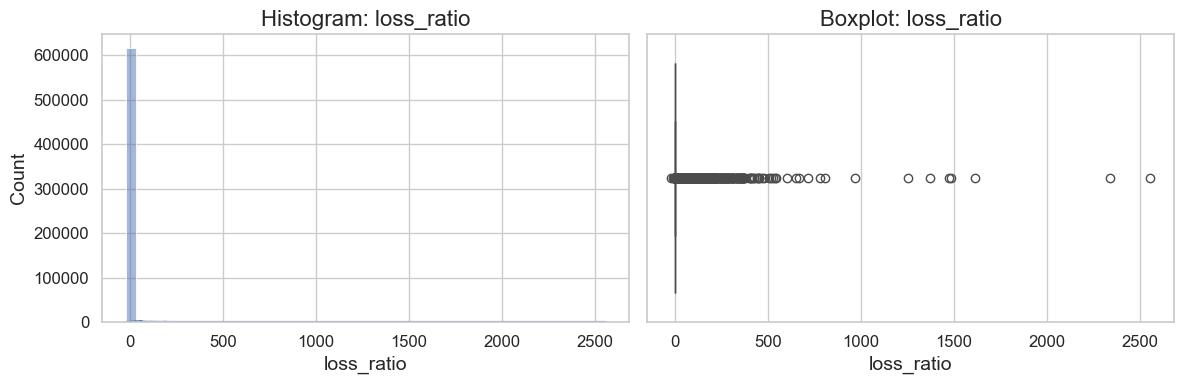

In [72]:
def plot_hist_box(df, col, fig_dir, bins=50):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[col].dropna(), bins=bins, kde=True, ax=axes[0])
    axes[0].set_title(f"Histogram: {col}")
    sns.boxplot(x=df[col].dropna(), ax=axes[1])
    axes[1].set_title(f"Boxplot: {col}")
    plt.tight_layout()
    plt.savefig(fig_dir / f"{col}_hist_box.png", dpi=200)
    plt.show()

numeric_cols = [col_total_premium, col_total_claims, "loss_ratio"]
for c in numeric_cols:
    if c in df.columns:
        plot_hist_box(df, c, FIG_DIR)


# Cell 8 – Outlier Detection
This cell identifies outliers in `totalpremium` and `totalclaims` using the IQR method.


In [73]:
# Columns to check
outlier_cols = [col_total_premium, col_total_claims]

outlier_summary = []
for c in outlier_cols:
    if c in df.columns:
        q1 = df[c].quantile(0.25)
        q3 = df[c].quantile(0.75)
        iqr = q3 - q1
        low = q1 - 1.5 * iqr
        high = q3 + 1.5 * iqr
        n_out = df[(df[c] < low) | (df[c] > high)].shape[0]
        outlier_summary.append({"column": c, "n_outliers": int(n_out), "low": low, "high": high})

pd.DataFrame(outlier_summary)


,column,n_outliers,low,high
0,totalpremium,209042,-32.894737,54.824561
1,totalclaims,2793,0.000000,0.000000


# Cell 9 – Loss Ratio by Groups
This cell calculates the mean loss ratio per group:
- Province
- Vehicle Type
- Gender


,total_premium,total_claims,loss_ratio,n_policies
province,,,,
Gauteng,2.405377e+07,2.939415e+07,0.428889,393865
Mpumalanga,2.836292e+06,2.044675e+06,0.392698,52718
Limpopo,1.537324e+06,1.016477e+06,0.348712,24836
Western Cape,9.806559e+06,1.038977e+07,0.341750,170796
North West,7.490508e+06,5.920250e+06,0.285348,143287
KwaZulu-Natal,1.320908e+07,1.430138e+07,0.264746,169781
Eastern Cape,2.140104e+06,1.356427e+06,0.235589,30336
Northern Cape,3.165581e+05,8.949051e+04,0.203831,6380
Free State,5.213632e+05,3.549223e+05,0.106209,8099


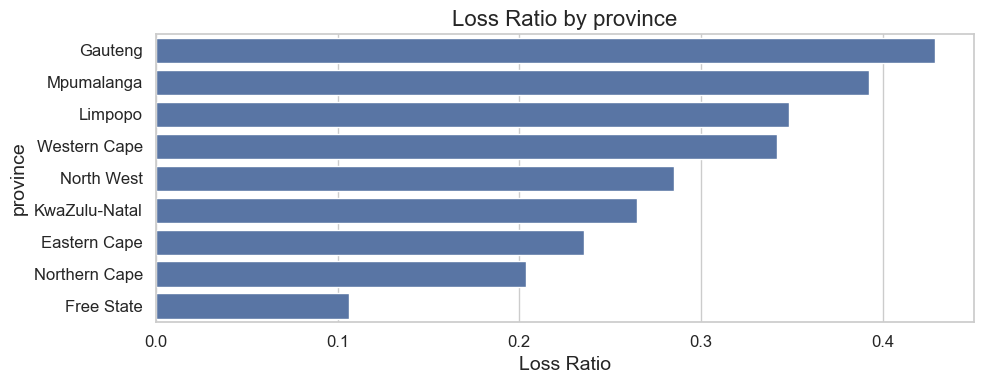

,total_premium,total_claims,loss_ratio,n_policies
vehicletype,,,,
Heavy Commercial,4.609479e+05,7.504746e+05,0.793617,7401
Light Commercial,2.604975e+05,6.045250e+04,0.543917,3897
Medium Commercial,3.922746e+06,4.119867e+06,0.493356,53985
Passenger Vehicle,5.664202e+07,5.937207e+07,0.337368,933598
Bus,5.824474e+04,7.996535e+03,0.000000,665


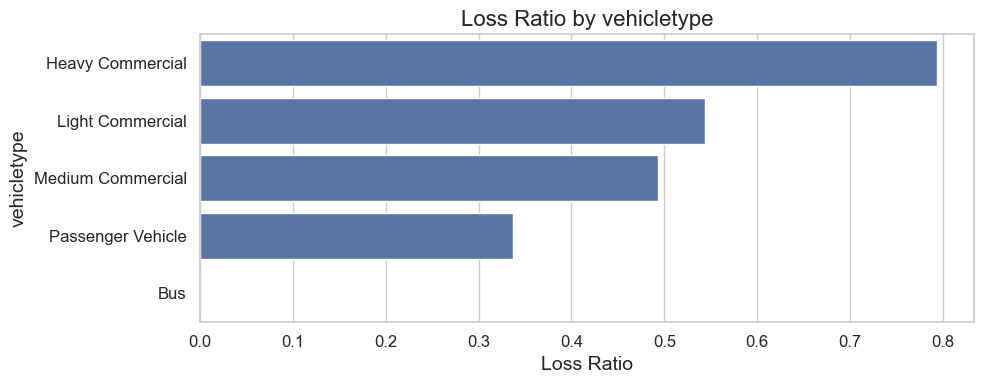

,total_premium,total_claims,loss_ratio,n_policies
gender,,,,
Female,3.044806e+05,2.502461e+05,0.491979,6755
Male,1.580143e+06,1.396704e+06,0.348852,42817
Not specified,5.920275e+07,6.271410e+07,0.347904,940990


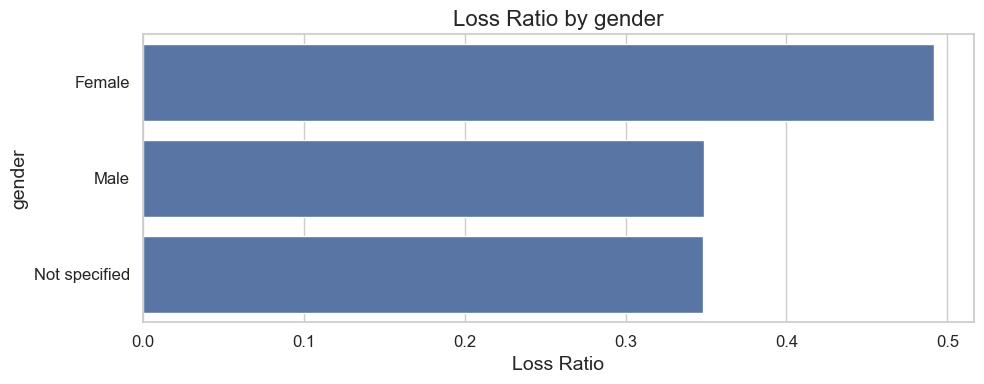

In [74]:
group_cols = [col_province, col_vehicle, col_gender]
agg_results = {}

if "loss_ratio" in df.columns:
    for g in group_cols:
        if g in df.columns:
            ag = df.groupby(g).agg(
                total_premium=(col_total_premium, "sum"),
                total_claims=(col_total_claims, "sum"),
                loss_ratio=("loss_ratio", "mean"),
                n_policies=(col_total_premium, "count")
            ).sort_values("loss_ratio", ascending=False)
            agg_results[g] = ag
            display(ag.head(20))
            
            # Bar plot
            plt.figure(figsize=(10, 4))
            sns.barplot(x=ag["loss_ratio"].fillna(0).values, y=ag.index)
            plt.title(f"Loss Ratio by {g}")
            plt.xlabel("Loss Ratio")
            plt.tight_layout()
            plt.savefig(FIG_DIR / f"loss_ratio_by_{g}.png", dpi=200)
            plt.show()


# Cell 10 – Monthly Loss Ratio Trend
This cell calculates and plots the monthly loss ratio trend if a transaction date exists.


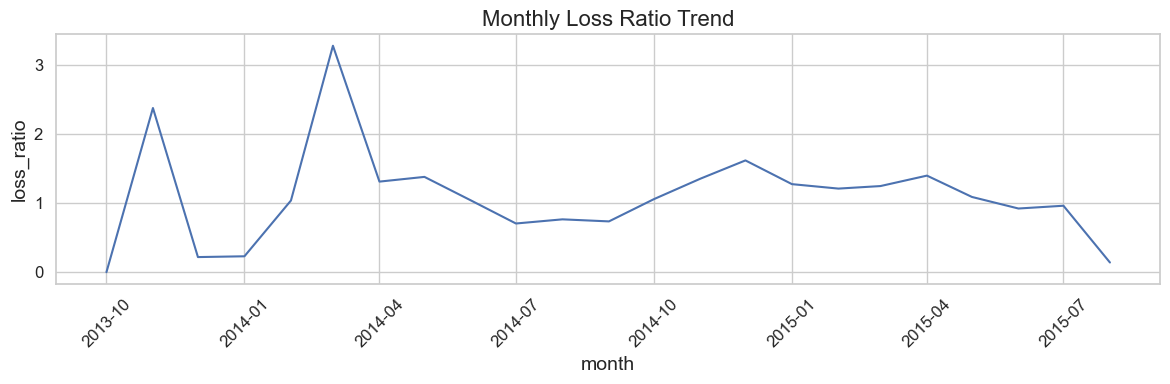

In [78]:
if col_transaction in df.columns:
    # Ensure the column is in datetime format
    df[col_transaction] = pd.to_datetime(df[col_transaction], errors='coerce')
    
    df["month"] = df[col_transaction].dt.to_period("m")
    monthly = df.groupby("month").agg(
        total_premium=(col_total_premium, "sum"),
        total_claims=(col_total_claims, "sum")
    ).reset_index()
    monthly["loss_ratio"] = monthly["total_claims"] / monthly["total_premium"]
    monthly["month"] = monthly["month"].dt.to_timestamp()
    
    plt.figure(figsize=(12, 4))
    sns.lineplot(x="month", y="loss_ratio", data=monthly)
    plt.title("Monthly Loss Ratio Trend")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(FIG_DIR / "monthly_loss_ratio.png", dpi=200)
    plt.show()


# Cell 11 – Numeric Correlation Matrix
This cell plots the correlation matrix for numeric columns.


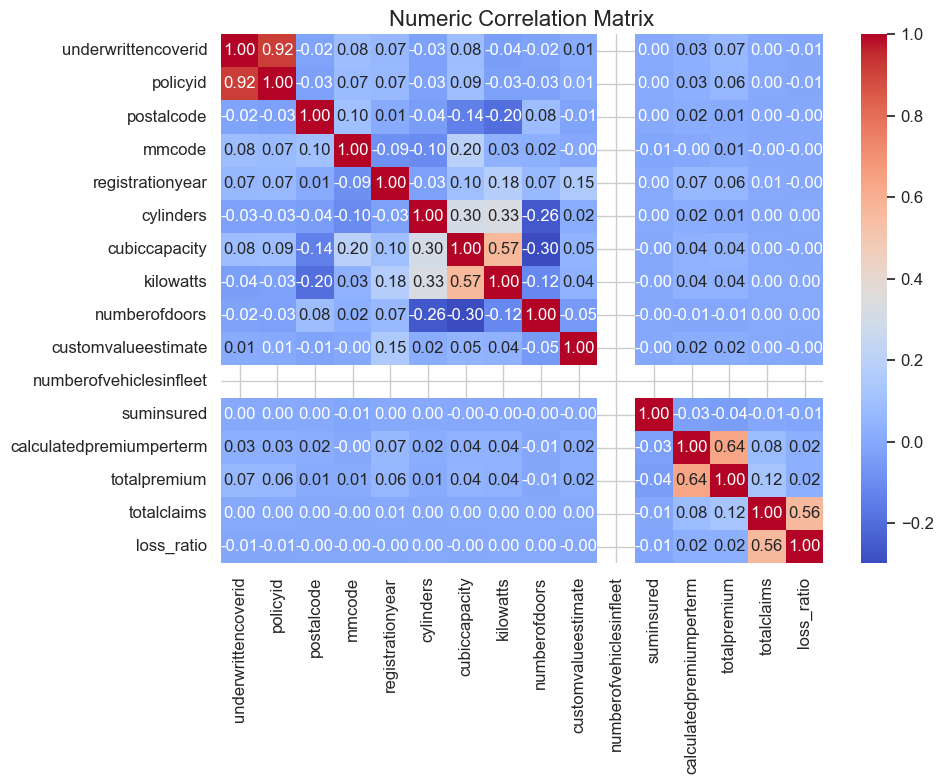

In [79]:
numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
if len(numeric_cols) >= 2:
    plt.figure(figsize=(10, 8))
    cm = df[numeric_cols].corr()
    sns.heatmap(cm, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Numeric Correlation Matrix")
    plt.tight_layout()
    plt.savefig(FIG_DIR / "correlation_matrix.png", dpi=200)
    plt.show()


# Cell 12 – Business-Grade Visuals
This cell generates three key visualizations for reporting:
1. Premium vs Claims (log-log scatter)
2. Claims by Province (boxplot)
3. Avg Claims: Vehicle x Province (heatmap)


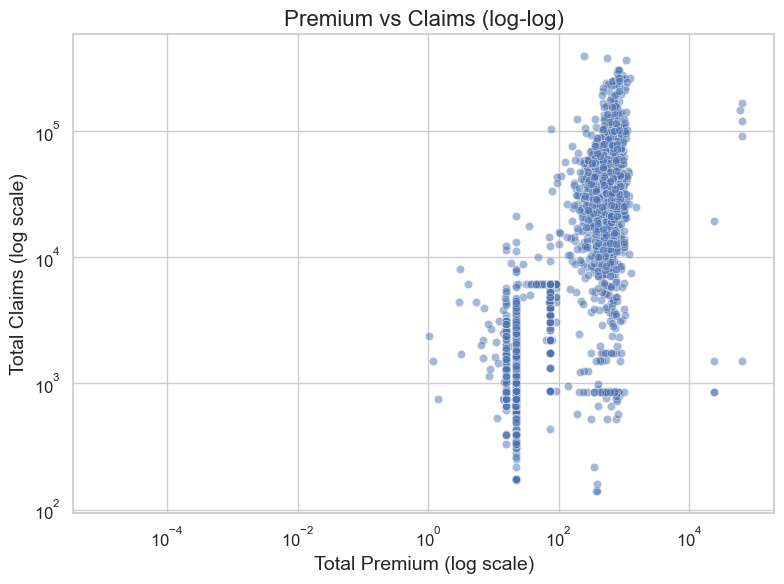

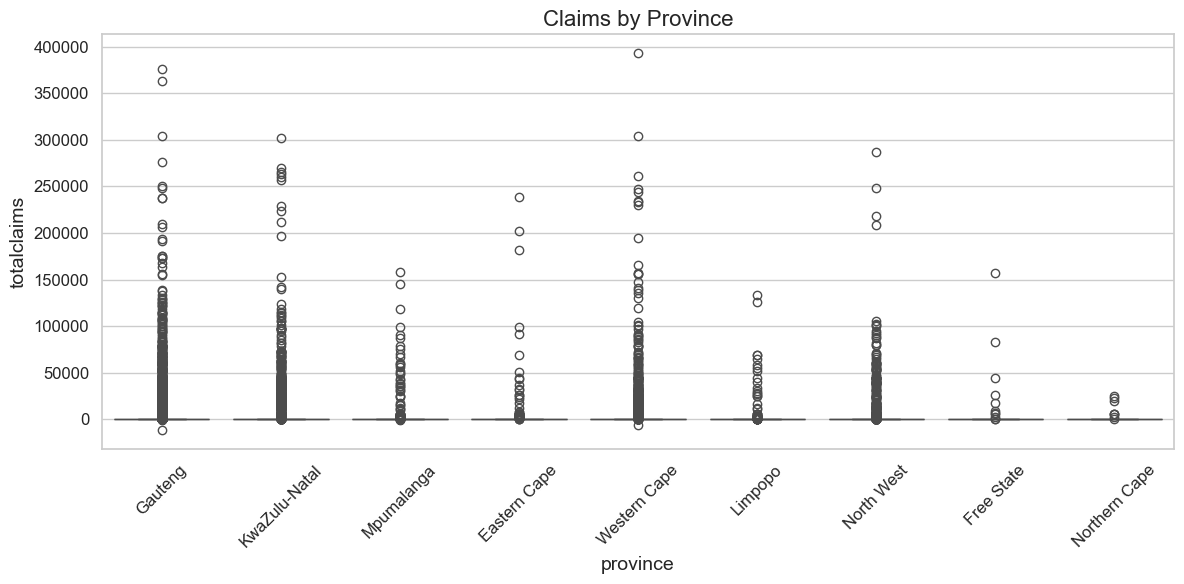

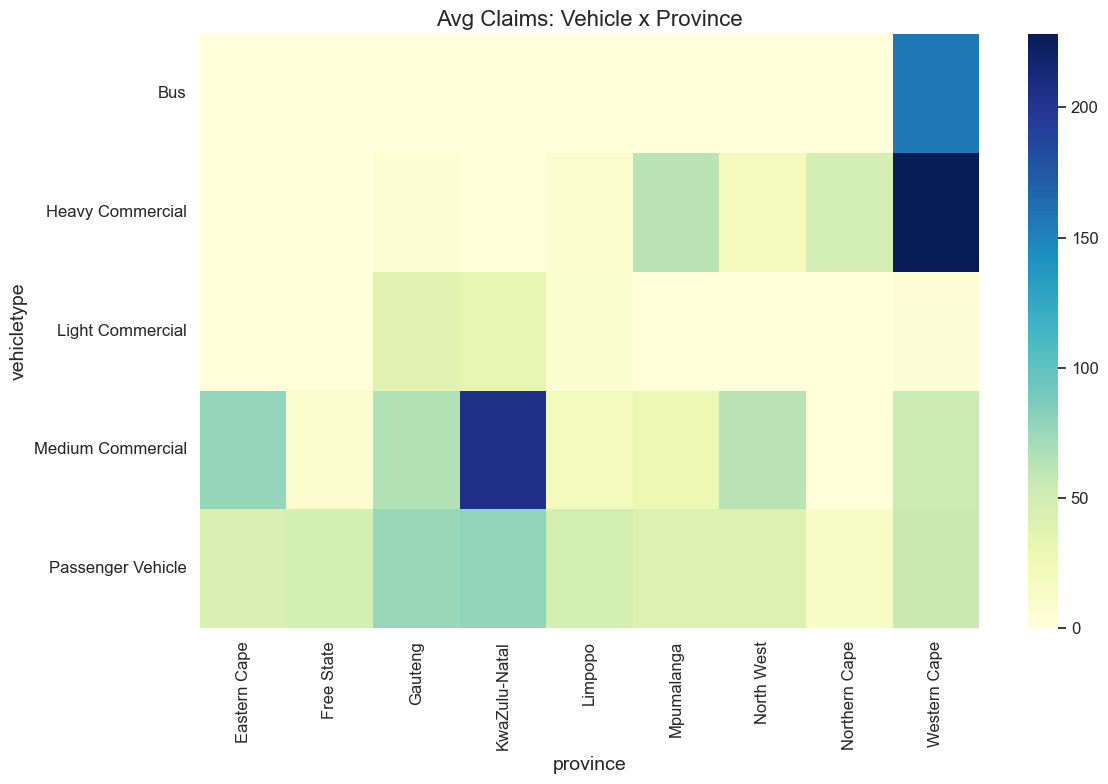

In [80]:
# 1) Premium vs Claims scatter
plt.figure(figsize=(8, 6))
sns.scatterplot(x=col_total_premium, y=col_total_claims, data=df, alpha=0.5)
plt.xscale("log")
plt.yscale("log")
plt.title("Premium vs Claims (log-log)")
plt.xlabel("Total Premium (log scale)")
plt.ylabel("Total Claims (log scale)")
plt.tight_layout()
plt.savefig(FIG_DIR / "premium_vs_claims_scatter.png", dpi=200)
plt.show()

# 2) Claims by Province boxplot
if col_province in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=col_province, y=col_total_claims, data=df)
    plt.title("Claims by Province")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(FIG_DIR / "claims_by_province_box.png", dpi=200)
    plt.show()

# 3) Avg Claims: Vehicle x Province heatmap
if col_vehicle in df.columns and col_province in df.columns:
    pivot = df.pivot_table(values=col_total_claims, index=col_vehicle, columns=col_province, aggfunc="mean").fillna(0)
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot, cmap="YlGnBu")
    plt.title("Avg Claims: Vehicle x Province")
    plt.tight_layout()
    plt.savefig(FIG_DIR / "avg_claims_vehicle_province.png", dpi=200)
    plt.show()


In [83]:
# ==========================
# Cell – EDA Summary Export
# ==========================

summary = {
    "n_rows": len(df),
    "n_columns": len(df.columns),
    "numeric_cols": numeric_cols,
    "overall_loss_ratio_mean": float(df["loss_ratio"].mean()),
    "overall_loss_ratio_median": float(df["loss_ratio"].median())
}

summary_df = pd.DataFrame([summary])
summary_df.to_csv("reports/eda_summary.csv", index=False)
display(summary_df)

print("EDA summary saved to reports/eda_summary.csv")


,n_rows,n_columns,numeric_cols,overall_loss_ratio_mean,overall_loss_ratio_median
0,1000098,54,"[underwrittencoverid, policyid, postalcode, mm...",0.349885,0.0


EDA summary saved to reports/eda_summary.csv
